In [1]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy

# My Tools
from toolkit.tools import print_column_uniques, make_df,get_column_uniques


%matplotlib inline

In [2]:
# Reseting figure size params.
plt.rcParams["figure.figsize"] = [12, 7]

In [3]:
# Setting seaborn as default plotting lib.
sns.set()
sns.set_palette("pastel")

In [4]:
# Creating the dataset.
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [5]:
# COLORS
# ============================
# Light
color_hombres_light = '#8ecae6'
color_mujeres_light = '#ffafcc'
color_neutro_light = '#d4a373'
# Dark
color_hombres_dark = '#023047'
color_mujeres_dark = '#ff006e'
color_neutro_dark = '#ffb703'

# Education

    - About the "education level" of the people who answered the survey.

## General Education
    - column name : 'educacion'

In [6]:
# First lets print the column content.
df["educacion"].value_counts()

Ed. Universitaria                                                           151
Ed. Basica;Ed. Secundaria;Ed. Universitaria                                  42
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Autodidacta                      36
Ed. Universitaria;Autodidacta                                                29
Master                                                                       17
Ed. Secundaria                                                               12
Ed. Basica;Ed. Secundaria                                                    11
Ed. Basica;Ed. Secundaria;Autodidacta                                        10
Ed. Universitaria;Master                                                      8
Ed. Secundaria;Autodidacta                                                    8
Ed. Basica;Ed. Secundaria;Ed. Universitaria;Master                            4
Ed. Universitaria;Master;Autodidacta                                          3
Autodidacta                             

In [7]:
# Printing "unique" values in the column.
print_column_uniques(df, "educacion")

{'Ed. Secundaria', 'Master', 'Doctorado', 'Ed. Universitaria', 'Autodidacta', 'Ed. Basica'}


              Levels  TotalCount
0     Ed. Secundaria         130
1             Master          38
2          Doctorado           2
3  Ed. Universitaria         279
4        Autodidacta          94
5         Ed. Basica         107


<Figure size 648x360 with 0 Axes>

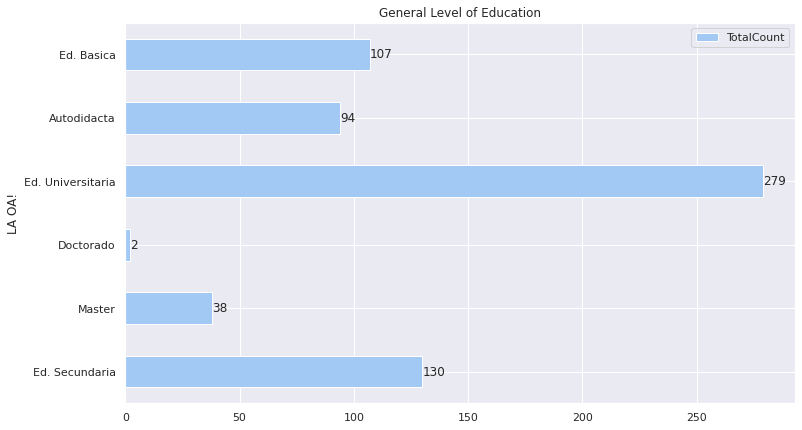

In [46]:
# Making a plot for this column.
fig = plt.figure(figsize=(9, 5))
# Declaring the plot.
nv_ed = make_df(df, "educacion","Levels", "Total Count")

nv_ed_plot = nv_ed.plot(
    kind="barh", 
    title="General Level of Education",
    xlabel='LA OA!',
    legend=True)


nv_ed_plot.set_yticks([0,1,2,3,4,5], minor=False)
nv_ed_plot.set_yticklabels(['Ed. Secundaria', 'Master', 'Doctorado', 'Ed. Universitaria', 'Autodidacta', 'Ed. Basica'], fontdict=None, minor=False)

cat_values = [i for i in nv_ed.TotalCount.value_counts().keys()]


print(nv_ed)

# Plot annotations.
for k, v in enumerate(cat_values):
    nv_ed_plot.annotate(v, (v, k), va="center")

    #nv_ed_plot.annotate(v, (v,k),va='center')

plt.show()


In [47]:
df['educacion'].str.split(';').value_counts()

[Ed. Universitaria]                                                                151
[Ed. Basica, Ed. Secundaria, Ed. Universitaria]                                     42
[Ed. Basica, Ed. Secundaria, Ed. Universitaria, Autodidacta]                        36
[Ed. Universitaria, Autodidacta]                                                    29
[Master]                                                                            17
[Ed. Secundaria]                                                                    12
[Ed. Basica, Ed. Secundaria]                                                        11
[Ed. Basica, Ed. Secundaria, Autodidacta]                                           10
[Ed. Universitaria, Master]                                                          8
[Ed. Secundaria, Autodidacta]                                                        8
[Ed. Basica, Ed. Secundaria, Ed. Universitaria, Master]                              4
[Ed. Universitaria, Master, Autodidacta]   

## Carers or Specialties
    - column name : 'carr_especialidades'

In [10]:
# Printing the column content.
df["carr_especialidades"].value_counts()

Ing. Informática                                                        107
Análisis de Sist.                                                        69
Programación;Análisis de Sist.                                           33
Programación;Ing. Informática                                            21
Programación                                                             17
Programación;Análisis de Sist.;Ing. Informática                          17
Ninguna                                                                  15
Análisis de Sist.;Ing. Informática                                       11
Ing. Electrónica                                                          6
Otras                                                                     5
Programación;Análisis de Sist.;Otras                                      5
Ing. Informática;Otras                                                    4
Otras Ing.                                                                4
Análisis de 

In [11]:
# Creating a plot for this column.
fig = plt.figure(figsize=(9, 5))
# Plot.
carr_df = make_df(df, "carr_especialidades").plot(
    kind="barh",
    title="Careers or Specialties - General",
    xlabel="Carers / Specialties",
    legend=False,
)

# Plot annotations.
for k, v in enumerate([i for i in make_df(df, "carr_especialidades")["count"]]):
    carr_df.annotate(v, (v, k), va="center")
plt.show()

TypeError: make_df() missing 2 required positional arguments: 'x_label' and 'y_label'

<Figure size 648x360 with 0 Axes>

## Importance of Formal Education
    - column name : 'imp_ed_formal'

In [ ]:
# Ploting a figure for this column.
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)
# Plot
exp_df = (
    df["imp_ed_formal"]
    .value_counts()
    .plot(kind="barh", title="Importancia de la educacion formal.")
)
# Plot annotations.
for k, v in enumerate(df["imp_ed_formal"].value_counts().values):
    exp_df.annotate(v, (v, k), va="center")
plt.show()

## Educational Level x Gender

    - We explore the "educational level" of the people who answered the survey by gender.

In [ ]:
# Making groups by gender.
gen = df.groupby("genero")

In [ ]:
# Print genders keys.
df["genero"].value_counts().keys()

### Education Level - HOMBRE
    - Education level for the group of MENS. 

In [ ]:
# Available Columns:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

In [ ]:
# Print group 'HOMBRE' and the column 'educacion' with its value counts.
gen.get_group("HOMBRE")["educacion"].value_counts()

In [ ]:
# Making a plot for this 'relation'.
fig = plt.figure(figsize=(9, 5))
# Plot
ed_hombres_df = make_df(gen.get_group("HOMBRE"), "educacion").plot(
    kind="barh",
    title="Education Level - HOMBRE",
    xlabel="Education Level",
    fontsize=13,
    legend=False,
)
# Plot annotations.
for k, v in enumerate(
    [i for i in make_df(gen.get_group("HOMBRE"), "educacion")["count"]]
):
    if v < 10:
        # if count its less than 10, value will be painted in 'red'.
        ed_hombres_df.annotate(v, (v, k), va="center", color="red")
    else:
        # if count its greather than 10, value will be painted in 'blue'.
        ed_hombres_df.annotate(v, (v, k), va="center", color="black")
plt.show()

### Careers or Specialties - HOMBRE

    - Column name : 'carr_especialidades'

In [ ]:
# Print 'value counts' of this column.
gen.get_group("HOMBRE")["carr_especialidades"].value_counts()

In [ ]:
# Making a plot for this column.
fig = plt.figure(figsize=(9, 5))
# Plot
carr_hombres_df = make_df(gen.get_group("HOMBRE"), "carr_especialidades").plot(
    kind="barh",
    title="Carers or Specialties - HOMBRES",
    xlabel="Carers / Specialties",
)
# Plot annotations.
for k, v in enumerate(
    [i for i in make_df(gen.get_group("HOMBRE"), "carr_especialidades")["count"]]
):
    if v < 10:
        # If count its less than 10, value will be painted in 'red'.
        carr_hombres_df.annotate(v, (v, k), va="center", color="red")
    else:
        # If count its greather than 10, value will be painted in 'blue'.
        carr_hombres_df.annotate(v, (v, k), va="center", color="blue")
plt.show()

 - NOTE: There is a theoretical or scope conflict within the content of this column. A career is an academic degree and a specialty is a branch of knowledge within a career. Within the column the category "programacion, ninguna, Otras" are presented. It makes no sense to consider them.

### Importance of formal education. - HOMBRES

In [ ]:
# Print the 'normal count' of values in the column.
df["imp_ed_formal"].value_counts()

In [ ]:
# Any null value?
df["imp_ed_formal"].isna().sum()

In [ ]:
# Making a chart for this column.
fig = plt.figure(figsize=(9, 5))
ax1 = plt.subplot(111)
# Plot
import_df = (
    df["imp_ed_formal"]
    .value_counts()
    .plot(
        kind="barh",
        title="Importancia de la educacion formal. - HOMBRES",
    )
)
# Plot annotations.
for k, v in enumerate(df["imp_ed_formal"].value_counts().values):
    if v < 10:
        import_df.annotate(v, (v, k), va="center", color="red")
    else:
        import_df.annotate(v, (v, k), va="center", color="black")
plt.show()

### EDUCACION - MUJERES

In [ ]:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

 - Grouped in this way, the content of the column makes no sense. We will try to separate each "category".

In [ ]:
gen.get_group("MUJER")["educacion"].value_counts()

In [ ]:
fig = plt.figure(figsize=(9, 5))


ed_mujeres_df = make_df(gen.get_group("MUJER"), "educacion").plot(
    kind="barh",
    title="Level of Education - MUJERES",
    xlabel="Education Level",
    legend=False,
)


for k, v in enumerate(
    [i for i in make_df(gen.get_group("MUJER"), "educacion")["count"]]
):
    if v < 10:
        ed_mujeres_df.annotate(v, (v, k), va="center", color="red")
    else:
        ed_mujeres_df.annotate(v, (v, k), va="center", color="black")

plt.show()

### Carreras o especialidades. - MUJERES
 - column name : 'carr_especialidades'

In [ ]:
fig = plt.figure(figsize=(9, 5))


carr_mujeres_df = make_df(gen.get_group("MUJER"), "carr_especialidades").plot(
    kind="barh",
    xlabel="Carers / Specialties",
    title="Carreras o especialidades. - MUJERES",
    legend=False,
)


for k, v in enumerate(
    [i for i in make_df(gen.get_group("MUJER"), "carr_especialidades")["count"]]
):
    if v < 10:
        carr_mujeres_df.annotate(v, (v, k), va="center", color="red")
    else:
        carr_mujeres_df.annotate(v, (v, k), va="center", color="blue")

plt.show()

# Importancia de la educacion formal. - MUJERES

 - column name : 'imp_ed_formal'

In [ ]:
fig = plt.figure(figsize=(9, 5))

muj_import_df = (
    gen.get_group("MUJER")["imp_ed_formal"]
    .value_counts()
    .plot(kind="barh", title="Inportancia de la educacion formal. - MUJERES")
)

for k, v in enumerate(gen.get_group("MUJER")["imp_ed_formal"].value_counts().values):
    if v < 10:
        muj_import_df.annotate(v, (v, k), va="center", color="red")
    else:
        muj_import_df.annotate(v, (v, k), va="center", color="blue")

plt.show()

### EDUCACION - NO COMPARTO

In [ ]:
#'educación'
#'carreras_o_especialidades'
#'importancia_educación_formal'

In [ ]:
fig = plt.figure(figsize=(9, 5))
ed_no_comp_df = make_df(gen.get_group("NO COMPARTO"), "educacion").plot(
    kind="barh", title="Educacion - NO COMPARTO", color=color_neutro_light
)
for k, v in enumerate(
    [i for i in make_df(gen.get_group("NO COMPARTO"), "educacion")["count"]]
):
    ed_no_comp_df.annotate(v, (v, k), va="center", color="blue")

plt.show()

### Carreras o especialidades. - NO DEFINIDO

In [ ]:
fig = plt.figure(figsize=(9, 5))


carr_no_comp_df = make_df(gen.get_group("NO COMPARTO"), "carr_especialidades").plot(
    kind="barh",
    title="Carreras o especialidades. - NO COMPARTO",
    color=color_neutro_light,
)


for k, v in enumerate(
    [i for i in make_df(gen.get_group("NO COMPARTO"), "carr_especialidades")["count"]]
):
    carr_no_comp_df.annotate(v, (v, k), va="center", color="blue")

plt.show()

### Importancia de la educacion formal. - NO DEFINIDO

In [ ]:
fig = plt.figure(figsize=(9, 5))
imp_ed_no_comp = (
    gen.get_group("NO COMPARTO")["imp_ed_formal"]
    .value_counts()
    .plot(
        kind="barh",
        title="Importancia de la educacion formal. - NO COMPARTO",
        color=color_neutro_light,
    )
)

for k, v in enumerate(
    [i for i in gen.get_group("NO COMPARTO")["imp_ed_formal"].value_counts().values]
):
    imp_ed_no_comp.annotate(v, (v, k), va="center", color="blue")

plt.show()

In [ ]:
df.columns